In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.4.1'

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape
#(50000 samples, 32x32 pixels, 3 dimensions:RGB)

(50000, 32, 32, 3)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])
    print(classes[y_train[index][0]])

frog


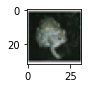

In [9]:
plot(234)

In [10]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [11]:
y_train_categorical = keras.utils.to_categorical(y_train,
                                                 num_classes=10,
                                                 dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
y_test_categorical = keras.utils.to_categorical(y_test,
                                                 num_classes=10,
                                                 dtype='float32')

In [14]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

    model.compile(optimizer='SGD',
             loss='categorical_crossentropy', #used for one hot encoded y
             metrics=['accuracy'])
    
    return model

In [16]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9327 - accuracy: 0.3021
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6414 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5499 - accuracy: 0.4524
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4823 - accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4427 - accuracy: 0.4969
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3866 - accuracy: 0.5129
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3474 - accuracy: 0.5287
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3173 - accuracy: 0.5352
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2772 - accuracy: 0.5504
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.245

In [17]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.9242 - accuracy: 0.3068
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.6415 - accuracy: 0.4187
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5465 - accuracy: 0.4571
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4822 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4450 - accuracy: 0.4930
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3962 - accuracy: 0.5084
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3470 - accuracy: 0.5277
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3128 - accuracy: 0.5394
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2858 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] - 37s 24m